In [ ]:
%pip install kaggle

In [8]:
import os
import subprocess

out_dir = "./us_accidents_data"
os.makedirs(out_dir, exist_ok=True)

subprocess.run([
    "kaggle", "datasets", "download",
    "-d", "sobhanmoosavi/us-accidents",
    "-p", out_dir,
    "--unzip"
], check=True)

print("Done. Files in:", os.path.abspath(out_dir))

Done. Files in: c:\Users\peter\OneDrive\Desktop\INF8808\INF8808_Projet\us_accidents_data


In [9]:
import pandas as pd

# Load the US Accidents data
df = pd.read_csv("us_accidents_data/US_Accidents_March23.csv")
print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Dataset shape: (7728394, 46)
Total rows: 7728394, Total columns: 46


## Tableau 2.2.5
Informations qualitatives sur la météo

In [ ]:
print("Wind_Direction Column Info:")
print(f"Data type: {df['Wind_Direction'].dtype}")
print(f"Non-null values: {df['Wind_Direction'].notna().sum()}")
print(f"Unique values: {df['Wind_Direction'].nunique()}")
print("\nWind direction distribution:")
wind_counts = df['Wind_Direction'].value_counts()
wind_percentages = (wind_counts / wind_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(wind_counts, wind_percentages)):
    print(f"{wind_counts.index[idx]}: {count} ({pct:.2f}%)")

Wind_Direction Column Info:
Data type: str
Non-null values: 7553188
Unique values: 24

Wind direction distribution:
Wind_Direction
CALM        961624
S           419989
SSW         384840
W           383913
WNW         378781
NW          369352
Calm        368557
SW          364470
WSW         353806
SSE         349110
NNW         333427
N           307151
SE          294901
E           278914
ESE         268311
NE          258639
ENE         258474
NNE         255311
VAR         250566
South       177375
West        164751
North       153385
Variable    113996
East        103545
Name: count, dtype: int64


In [ ]:
print("Weather_Condition Column Info:")
print(f"Data type: {df['Weather_Condition'].dtype}")
print(f"Non-null values: {df['Weather_Condition'].notna().sum()}")
print(f"Unique values: {df['Weather_Condition'].nunique()}")
print("\nTop 10 weather conditions:")
weather_counts = df['Weather_Condition'].value_counts().head(10)
weather_percentages = (weather_counts / df['Weather_Condition'].count()) * 100
for idx, (count, pct) in enumerate(zip(weather_counts, weather_percentages)):
    print(f"{weather_counts.index[idx]}: {count} ({pct:.2f}%)")

Weather_Condition Column Info:
Data type: str
Non-null values: 7554935
Unique values: 144

Top 10 weather conditions:
Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64
Percentage covered by top 10 conditions:
93.59% of all weather conditions are in the top 10.


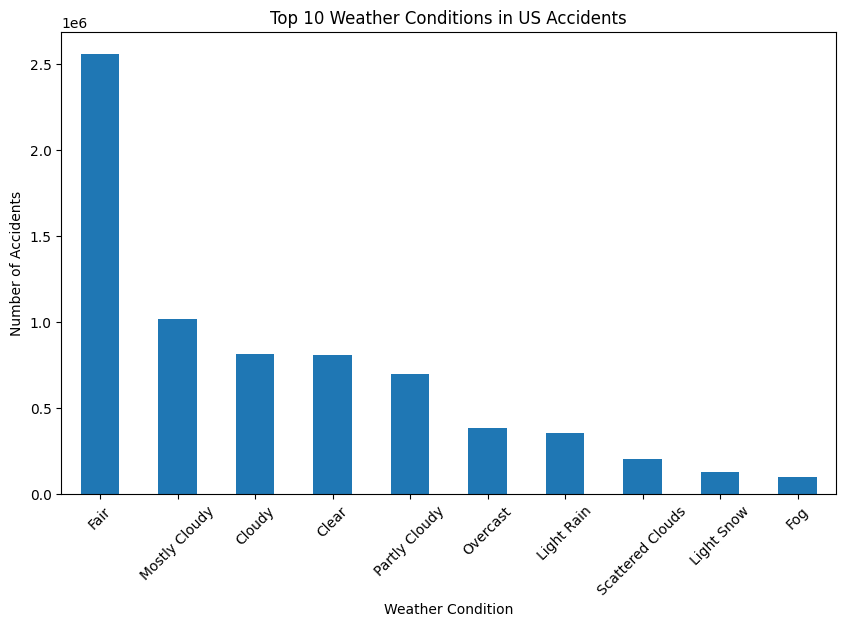

In [13]:
#visualize the distribution of weather conditions
import matplotlib.pyplot as plt

top_conditions = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar')
plt.title('Top 10 Weather Conditions in US Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Tableau 2.2.6
Infrastructures et caractéristiques routières

In [ ]:
print("Junction Column Info:")
print(f"Data type: {df['Junction'].dtype}")
print(f"Non-null values: {df['Junction'].notna().sum()}")
print(f"Unique values: {df['Junction'].nunique()}")
print("\nJunction distribution:")
junction_counts = df['Junction'].value_counts()
junction_percentages = (junction_counts / junction_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(junction_counts, junction_percentages)):
    print(f"{junction_counts.index[idx]}: {count} ({pct:.2f}%)")

Junction Column Info:
Data type: bool
Non-null values: 7728394
Unique values: 2

Junction distribution:
Junction
False    7157052
True      571342
Name: count, dtype: int64


In [ ]:
print("Traffic_Signal Column Info:")
print(f"Data type: {df['Traffic_Signal'].dtype}")
print(f"Non-null values: {df['Traffic_Signal'].notna().sum()}")
print(f"Unique values: {df['Traffic_Signal'].nunique()}")
print("\nTraffic signal distribution:")
traffic_signal_counts = df['Traffic_Signal'].value_counts()
traffic_signal_percentages = (traffic_signal_counts / traffic_signal_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(traffic_signal_counts, traffic_signal_percentages)):
    print(f"{traffic_signal_counts.index[idx]}: {count} ({pct:.2f}%)")

Traffic_Signal Column Info:
Data type: bool
Non-null values: 7728394
Unique values: 2

Traffic signal distribution:
Traffic_Signal
False    6584622
True     1143772
Name: count, dtype: int64


In [ ]:
print("Stop/Give_Way Column Info (OR operation):")
stop_or_give_way = df['Stop'] | df['Give_Way']
print(f"Data type: bool")
print(f"Non-null values: {stop_or_give_way.notna().sum()}")
stop_counts = stop_or_give_way.value_counts()
stop_percentages = (stop_counts / stop_counts.sum()) * 100
print("Stop OR Give_Way distribution:")
for idx, (count, pct) in enumerate(zip(stop_counts, stop_percentages)):
    print(f"{stop_counts.index[idx]}: {count} ({pct:.2f}%)")

Stop/Give_Way Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Stop OR Give_Way distribution:
False    7481130
True      247264
Name: count, dtype: int64


In [ ]:
print("Crossing Column Info:")
print(f"Data type: {df['Crossing'].dtype}")
print(f"Non-null values: {df['Crossing'].notna().sum()}")
print(f"Unique values: {df['Crossing'].nunique()}")
print("\nCrossing distribution:")
crossing_counts = df['Crossing'].value_counts()
crossing_percentages = (crossing_counts / crossing_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(crossing_counts, crossing_percentages)):
    print(f"{crossing_counts.index[idx]}: {count} ({pct:.2f}%)")

Crossing Column Info:
Data type: bool
Non-null values: 7728394
Unique values: 2

Crossing distribution:
Crossing
False    6854631
True      873763
Name: count, dtype: int64


In [ ]:
print("Traffic_Calming/Bump Column Info (OR operation):")
traffic_calming_or_bump = df['Traffic_Calming'] | df['Bump']
print(f"Data type: bool")
print(f"Non-null values: {traffic_calming_or_bump.notna().sum()}")
tcb_counts = traffic_calming_or_bump.value_counts()
tcb_percentages = (tcb_counts / tcb_counts.sum()) * 100
print("Traffic_Calming OR Bump distribution:")
for idx, (count, pct) in enumerate(zip(tcb_counts, tcb_percentages)):
    print(f"{tcb_counts.index[idx]}: {count} ({pct:.2f}%)")

Traffic_Calming/Bump Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Traffic_Calming OR Bump distribution:
False    7720796
True        7598
Name: count, dtype: int64


In [ ]:
print("Railway/Roundabout Column Info (OR operation):")
railway_or_roundabout = df['Railway'] | df['Roundabout']
print(f"Data type: bool")
print(f"Non-null values: {railway_or_roundabout.notna().sum()}")
rr_counts = railway_or_roundabout.value_counts()
rr_percentages = (rr_counts / rr_counts.sum()) * 100
print("Railway OR Roundabout distribution:")
for idx, (count, pct) in enumerate(zip(rr_counts, rr_percentages)):
    print(f"{rr_counts.index[idx]}: {count} ({pct:.2f}%)")

Railway/Roundabout Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Railway OR Roundabout distribution:
False    7661166
True       67228
Name: count, dtype: int64


In [ ]:
print("Amenity/Station Column Info (OR operation):")
amenity_or_station = df['Amenity'] | df['Station']
print(f"Data type: bool")
print(f"Non-null values: {amenity_or_station.notna().sum()}")
as_counts = amenity_or_station.value_counts()
as_percentages = (as_counts / as_counts.sum()) * 100
print("Amenity OR Station distribution:")
for idx, (count, pct) in enumerate(zip(as_counts, as_percentages)):
    print(f"{as_counts.index[idx]}: {count} ({pct:.2f}%)")

Amenity/Station Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Amenity OR Station distribution:
False    7453375
True      275019
Name: count, dtype: int64


In [ ]:
print("No_Exit/Turning_Loop Column Info (OR operation):")
no_exit_or_turning_loop = df['No_Exit'] | df['Turning_Loop']
print(f"Data type: bool")
print(f"Non-null values: {no_exit_or_turning_loop.notna().sum()}")
netl_counts = no_exit_or_turning_loop.value_counts()
netl_percentages = (netl_counts / netl_counts.sum()) * 100
print("No_Exit OR Turning_Loop distribution:")
for idx, (count, pct) in enumerate(zip(netl_counts, netl_percentages)):
    print(f"{netl_counts.index[idx]}: {count} ({pct:.2f}%)")

No_Exit/Turning_Loop Column Info (OR operation):
Data type: bool
Non-null values: 7728394
No_Exit OR Turning_Loop distribution:
False    7708849
True       19545
Name: count, dtype: int64
